## Grand Challenge: RAVIR 
### Pipeline for multiclass classification. UNET with K-fold cross-validation and Dropout layers
#### Jonas Stylbäck & Miranda Gisudden

In [1]:
# External modules
%matplotlib inline
import sys
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input
from tensorflow.keras import backend as K

# Local modules
sys.path.append("/tf/ravir-challenge/") # Root path, change accordingly
from utils import *
from models import *

In [2]:
# Data parameters
train_dir = '/tf/ravir-challenge/dataset/train'
test_dir = '/tf/ravir-challenge/dataset/test'
img_w, img_h, img_c = 768, 768, 1
batch_size = 1
val_ratio = 0.3

# Model parameters
base = 8
dropout_rate = 0.2
optimizer = Adam
learning_rate = 1e-4
epochs = 150
metric = [multi_dice_coef]
loss_func = multi_dice_coef_loss

global model_history
model_history = []

In [3]:
# Read data
image_list = get_file_list(train_dir, 'training_images')
mask_list = get_file_list(train_dir, 'training_masks')

In [4]:
# K-fold cross-validation

k = 3

for fold in range(k):
    K.clear_session()
    
    # Load images
    train_image_list, train_mask_list, \
    val_image_list, val_mask_list = get_train_val_list_k_fold(
            image_list, mask_list, 1/3, k, fold+1)
    
    x_train = load_as_multiclass(train_image_list, img_w, img_h, img_c, 'image')
    y_train = load_as_multiclass(train_mask_list, img_w, img_h, img_c, 'mask')
    x_val = load_as_multiclass(val_image_list, img_w, img_h, img_c, 'image')
    y_val = load_as_multiclass(val_mask_list, img_w, img_h, img_c, 'mask')
    
    # Load model
    model = get_unet_MC_DO(base, img_w, img_h, img_c, dropout_rate)
    model_compile = model.compile(optimizer = optimizer(learning_rate = learning_rate), loss = loss_func, metrics = metric)
    
    # Train model
    steps_per_epoch = x_train.shape[0]//batch_size
    train_generator = generator(x_train, y_train, batch_size)
    
    model_history.append(model.fit(
            train_generator, batch_size = batch_size, steps_per_epoch = steps_per_epoch,
            epochs = epochs, validation_steps = len(x_val), validation_data = (x_val, y_val),
            shuffle=False))
    
    if fold < 2:
        del train_image_list, train_mask_list, val_image_list, val_mask_list, x_train, y_train, x_val, y_val, model, model_compile

Model: "UNET_with_Dropout"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer (InputLayer)       [(None, 768, 768, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 768, 768, 8)  80          ['input_layer[0][0]']            
                                                                                                  
 conv2d_1 (Conv2D)              (None, 768, 768, 8)  584         ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 384, 384, 8)  0           ['conv2d_1[0][0]'

 spose)                                                                                           
                                                                                                  
 concatenate_3 (Concatenate)    (None, 768, 768, 16  0           ['conv2d_transpose_3[0][0]',     
                                )                                 'conv2d_1[0][0]']               
                                                                                                  
 dropout_7 (Dropout)            (None, 768, 768, 16  0           ['concatenate_3[0][0]']          
                                )                                                                 
                                                                                                  
 conv2d_13 (Conv2D)             (None, 768, 768, 8)  1160        ['dropout_7[0][0]']              
                                                                                                  
 conv2d_14

16/16 [==============================] - 1s 84ms/step - loss: -0.1092 - multi_dice_coef: 0.1092 - val_loss: -0.1023 - val_multi_dice_coef: 0.1023
Epoch 44/150
16/16 [==============================] - 1s 84ms/step - loss: -0.1079 - multi_dice_coef: 0.1079 - val_loss: -0.1028 - val_multi_dice_coef: 0.1028
Epoch 45/150
16/16 [==============================] - 1s 86ms/step - loss: -0.1097 - multi_dice_coef: 0.1097 - val_loss: -0.1030 - val_multi_dice_coef: 0.1030
Epoch 46/150
16/16 [==============================] - 1s 95ms/step - loss: -0.1053 - multi_dice_coef: 0.1053 - val_loss: -0.1024 - val_multi_dice_coef: 0.1024
Epoch 47/150
16/16 [==============================] - 1s 88ms/step - loss: -0.1113 - multi_dice_coef: 0.1113 - val_loss: -0.1041 - val_multi_dice_coef: 0.1041
Epoch 48/150
16/16 [==============================] - 1s 88ms/step - loss: -0.1134 - multi_dice_coef: 0.1134 - val_loss: -0.1058 - val_multi_dice_coef: 0.1058
Epoch 49/150
16/16 [==============================] - 1s 90

16/16 [==============================] - 1s 96ms/step - loss: -0.1141 - multi_dice_coef: 0.1141 - val_loss: -0.1064 - val_multi_dice_coef: 0.1064
Epoch 95/150
16/16 [==============================] - 1s 87ms/step - loss: -0.1072 - multi_dice_coef: 0.1072 - val_loss: -0.1064 - val_multi_dice_coef: 0.1064
Epoch 96/150
16/16 [==============================] - 1s 91ms/step - loss: -0.1102 - multi_dice_coef: 0.1102 - val_loss: -0.1064 - val_multi_dice_coef: 0.1064
Epoch 97/150
16/16 [==============================] - 1s 86ms/step - loss: -0.1139 - multi_dice_coef: 0.1139 - val_loss: -0.1064 - val_multi_dice_coef: 0.1064
Epoch 98/150
16/16 [==============================] - 1s 90ms/step - loss: -0.1112 - multi_dice_coef: 0.1112 - val_loss: -0.1064 - val_multi_dice_coef: 0.1064
Epoch 99/150
16/16 [==============================] - 1s 87ms/step - loss: -0.1139 - multi_dice_coef: 0.1139 - val_loss: -0.1064 - val_multi_dice_coef: 0.1064
Epoch 100/150
16/16 [==============================] - 1s 8

16/16 [==============================] - 1s 88ms/step - loss: -0.1123 - multi_dice_coef: 0.1123 - val_loss: -0.1064 - val_multi_dice_coef: 0.1064
Epoch 146/150
16/16 [==============================] - 1s 86ms/step - loss: -0.1075 - multi_dice_coef: 0.1075 - val_loss: -0.1064 - val_multi_dice_coef: 0.1064
Epoch 147/150
16/16 [==============================] - 1s 88ms/step - loss: -0.1129 - multi_dice_coef: 0.1129 - val_loss: -0.1064 - val_multi_dice_coef: 0.1064
Epoch 148/150
16/16 [==============================] - 1s 86ms/step - loss: -0.1104 - multi_dice_coef: 0.1104 - val_loss: -0.1064 - val_multi_dice_coef: 0.1064
Epoch 149/150
16/16 [==============================] - 1s 85ms/step - loss: -0.1088 - multi_dice_coef: 0.1088 - val_loss: -0.1064 - val_multi_dice_coef: 0.1064
Epoch 150/150
16/16 [==============================] - 1s 88ms/step - loss: -0.1095 - multi_dice_coef: 0.1095 - val_loss: -0.1064 - val_multi_dice_coef: 0.1064
Model: "UNET_with_Dropout"
___________________________

 concatenate_2 (Concatenate)    (None, 384, 384, 32  0           ['conv2d_transpose_2[0][0]',     
                                )                                 'conv2d_3[0][0]']               
                                                                                                  
 dropout_6 (Dropout)            (None, 384, 384, 32  0           ['concatenate_2[0][0]']          
                                )                                                                 
                                                                                                  
 conv2d_12 (Conv2D)             (None, 384, 384, 16  4624        ['dropout_6[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_transpose_3 (Conv2DTran  (None, 768, 768, 8)  1160       ['conv2d_12[0][0]']              
 spose)   

15/15 [==============================] - 1s 86ms/step - loss: -0.1082 - multi_dice_coef: 0.1082 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 38/150
15/15 [==============================] - 1s 87ms/step - loss: -0.1066 - multi_dice_coef: 0.1066 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 39/150
15/15 [==============================] - 1s 93ms/step - loss: -0.1094 - multi_dice_coef: 0.1094 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 40/150
15/15 [==============================] - 1s 90ms/step - loss: -0.1084 - multi_dice_coef: 0.1084 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 41/150
15/15 [==============================] - 1s 89ms/step - loss: -0.1058 - multi_dice_coef: 0.1058 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 42/150
15/15 [==============================] - 1s 86ms/step - loss: -0.1027 - multi_dice_coef: 0.1027 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 43/150
15/15 [==============================] - 1s 90

15/15 [==============================] - 1s 92ms/step - loss: -0.1053 - multi_dice_coef: 0.1053 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 89/150
15/15 [==============================] - 1s 91ms/step - loss: -0.1056 - multi_dice_coef: 0.1056 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 90/150
15/15 [==============================] - 1s 85ms/step - loss: -0.1071 - multi_dice_coef: 0.1071 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 91/150
15/15 [==============================] - 1s 89ms/step - loss: -0.1050 - multi_dice_coef: 0.1050 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 92/150
15/15 [==============================] - 1s 89ms/step - loss: -0.1072 - multi_dice_coef: 0.1072 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 93/150
15/15 [==============================] - 1s 87ms/step - loss: -0.1073 - multi_dice_coef: 0.1073 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 94/150
15/15 [==============================] - 1s 88

15/15 [==============================] - 1s 91ms/step - loss: -0.1068 - multi_dice_coef: 0.1068 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 140/150
15/15 [==============================] - 1s 85ms/step - loss: -0.1068 - multi_dice_coef: 0.1068 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 141/150
15/15 [==============================] - 1s 88ms/step - loss: -0.1047 - multi_dice_coef: 0.1047 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 142/150
15/15 [==============================] - 1s 87ms/step - loss: -0.1064 - multi_dice_coef: 0.1064 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 143/150
15/15 [==============================] - 1s 89ms/step - loss: -0.1081 - multi_dice_coef: 0.1081 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 144/150
15/15 [==============================] - 1s 84ms/step - loss: -0.1064 - multi_dice_coef: 0.1064 - val_loss: -0.1193 - val_multi_dice_coef: 0.1193
Epoch 145/150
15/15 [==============================] -

 dropout_5 (Dropout)            (None, 192, 192, 64  0           ['concatenate_1[0][0]']          
                                )                                                                 
                                                                                                  
 conv2d_11 (Conv2D)             (None, 192, 192, 32  18464       ['dropout_5[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_transpose_2 (Conv2DTran  (None, 384, 384, 16  4624       ['conv2d_11[0][0]']              
 spose)                         )                                                                 
                                                                                                  
 concatenate_2 (Concatenate)    (None, 384, 384, 32  0           ['conv2d_transpose_2[0][0]',     
          

15/15 [==============================] - 1s 85ms/step - loss: -0.3146 - multi_dice_coef: 0.3146 - val_loss: -0.1601 - val_multi_dice_coef: 0.1601
Epoch 32/150
15/15 [==============================] - 1s 84ms/step - loss: -0.3112 - multi_dice_coef: 0.3112 - val_loss: -0.1784 - val_multi_dice_coef: 0.1784
Epoch 33/150
15/15 [==============================] - 1s 84ms/step - loss: -0.3185 - multi_dice_coef: 0.3185 - val_loss: -0.1674 - val_multi_dice_coef: 0.1674
Epoch 34/150
15/15 [==============================] - 1s 93ms/step - loss: -0.3244 - multi_dice_coef: 0.3244 - val_loss: -0.1842 - val_multi_dice_coef: 0.1842
Epoch 35/150
15/15 [==============================] - 1s 92ms/step - loss: -0.3212 - multi_dice_coef: 0.3212 - val_loss: -0.1736 - val_multi_dice_coef: 0.1736
Epoch 36/150
15/15 [==============================] - 1s 86ms/step - loss: -0.3258 - multi_dice_coef: 0.3258 - val_loss: -0.1927 - val_multi_dice_coef: 0.1927
Epoch 37/150
15/15 [==============================] - 1s 85

15/15 [==============================] - 1s 86ms/step - loss: -0.4152 - multi_dice_coef: 0.4152 - val_loss: -0.2822 - val_multi_dice_coef: 0.2822
Epoch 83/150
15/15 [==============================] - 1s 88ms/step - loss: -0.4133 - multi_dice_coef: 0.4133 - val_loss: -0.2822 - val_multi_dice_coef: 0.2822
Epoch 84/150
15/15 [==============================] - 1s 94ms/step - loss: -0.4153 - multi_dice_coef: 0.4153 - val_loss: -0.2705 - val_multi_dice_coef: 0.2705
Epoch 85/150
15/15 [==============================] - 1s 96ms/step - loss: -0.4206 - multi_dice_coef: 0.4206 - val_loss: -0.2805 - val_multi_dice_coef: 0.2805
Epoch 86/150
15/15 [==============================] - 1s 86ms/step - loss: -0.4310 - multi_dice_coef: 0.4310 - val_loss: -0.2746 - val_multi_dice_coef: 0.2746
Epoch 87/150
15/15 [==============================] - 1s 86ms/step - loss: -0.4270 - multi_dice_coef: 0.4270 - val_loss: -0.2921 - val_multi_dice_coef: 0.2921
Epoch 88/150
15/15 [==============================] - 1s 90

15/15 [==============================] - 1s 94ms/step - loss: -0.4449 - multi_dice_coef: 0.4449 - val_loss: -0.3222 - val_multi_dice_coef: 0.3222
Epoch 134/150
15/15 [==============================] - 1s 92ms/step - loss: -0.4559 - multi_dice_coef: 0.4559 - val_loss: -0.3231 - val_multi_dice_coef: 0.3231
Epoch 135/150
15/15 [==============================] - 1s 90ms/step - loss: -0.4521 - multi_dice_coef: 0.4521 - val_loss: -0.3190 - val_multi_dice_coef: 0.3190
Epoch 136/150
15/15 [==============================] - 1s 86ms/step - loss: -0.4469 - multi_dice_coef: 0.4469 - val_loss: -0.3196 - val_multi_dice_coef: 0.3196
Epoch 137/150
15/15 [==============================] - 1s 86ms/step - loss: -0.4596 - multi_dice_coef: 0.4596 - val_loss: -0.3132 - val_multi_dice_coef: 0.3132
Epoch 138/150
15/15 [==============================] - 1s 88ms/step - loss: -0.4569 - multi_dice_coef: 0.4569 - val_loss: -0.3381 - val_multi_dice_coef: 0.3381
Epoch 139/150
15/15 [==============================] -

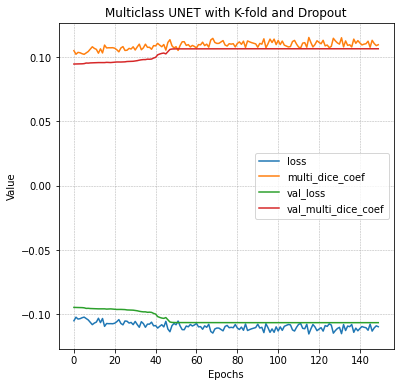

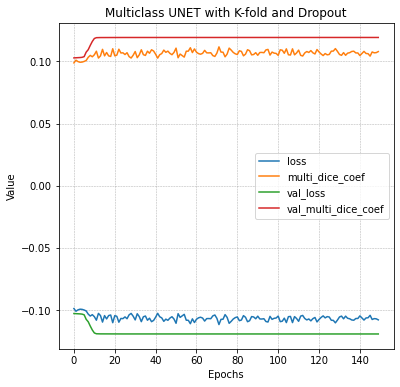

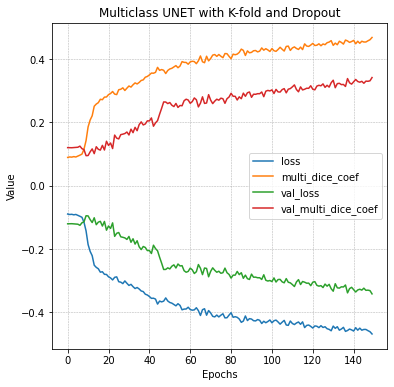

In [5]:
# Plot parameters
size_x = 6
size_y = 6
title = 'Multiclass UNET with K-fold and Dropout'
x_label = 'Epochs'
y_label = 'Value'
legend = True
print_keys = False

# Line plots of model history
plot_model_history(size_x, size_y, title, x_label, y_label, legend, print_keys, model_history[0])
plot_model_history(size_x, size_y, title, x_label, y_label, legend, print_keys, model_history[1])
plot_model_history(size_x, size_y, title, x_label, y_label, legend, print_keys, model_history[2])

1/1 [==============================] - 1s 1s/step

Shape and Unique values of prediction :
 (768, 768, 3) 
 [0.0000000e+00 1.1907815e-38 1.1955972e-38 ... 9.9999976e-01 9.9999988e-01
 1.0000000e+00]


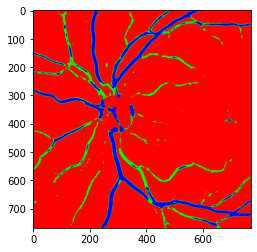

In [6]:
# Read and load test images for prediction
test_image_list = get_file_list(test_dir, '')
x_test = load_as_multiclass(test_image_list, img_w, img_h, img_c, 'image')

# Predict test images
predicted_mask_list = model.predict(x_test)

# Debugging information
get_image_information(predicted_mask_list, img_w, img_h, 'prediction', loaded = True)

1  out of  19  converted
2  out of  19  converted
3  out of  19  converted
4  out of  19  converted
5  out of  19  converted
6  out of  19  converted
7  out of  19  converted
8  out of  19  converted
9  out of  19  converted
10  out of  19  converted
11  out of  19  converted
12  out of  19  converted
13  out of  19  converted
14  out of  19  converted
15  out of  19  converted
16  out of  19  converted
17  out of  19  converted
18  out of  19  converted
19  out of  19  converted

Shape and Unique values of prediction mask :
 (768, 768) 
 [  0 128 255]


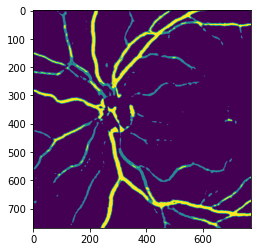

In [7]:
# Save predicted images to folder
save_multiclass_predictions(predicted_mask_list[0:len(predicted_mask_list)])

# Debugging information
prediction_list = get_file_list('/tf/ravir-challenge/predictions', '')
get_image_information(prediction_list, img_w, img_h, 'prediction mask', loaded = False)